# Notebook for making graphs of the modelling results

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from typing import List


def process_netlogo_experiment_csv(
    filename: str, delete_rows: bool = True
) -> pd.DataFrame:

    if delete_rows:
        delete_redundant_rows(filename)

    df = pd.read_csv(filename, header=None, skiprows=6, nrows=12)

    df = df.transpose()

    # Set the header row as the df header
    df.columns = df.iloc[0]

    # Drop the first row
    df = df[1:]

    # Reset the index
    df = df.reset_index(drop=True)

    return df


def delete_redundant_rows(filename: str) -> None:
    """
    Delete the rows of the file that are not needed for the analysis
    """
    lines: List[str] = []
    with open(filename, "r") as f:
        lines = f.readlines()

        # Delete all lines after the 18th line
        del lines[19:]

    with open(filename, "w") as f:
        f.writelines(lines)

### Charity experiment

In this experiment we test the effect of the charity parameter on the amount of poor people in the population.

In [23]:
charity_data = process_netlogo_experiment_csv("data/charity_experiment_0_to_100.csv")

# Convert mean column to float
charity_data['[mean]'] = charity_data['[mean]'].astype(float)

charity_data['charity'] = charity_data['charity'].astype(int)

print(charity_data.shape)
charity_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/charity_experiment_1_to_100.csv'

Plot the average amount of poor people in the population for different values of the charity parameter.
Averaged over 5 runs.

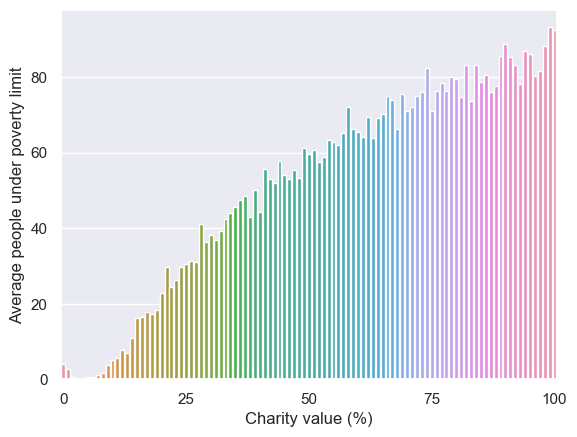

In [22]:
# Group rows by the "charity" parameter and calculate the mean of the "mean" column
grouped_data = charity_data.groupby('charity')['[mean]'].mean()

# print(grouped_data)

# Plot the grouped data
sns.set()

ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

ax.set(xlabel='Charity value (%)', ylabel='Average people under poverty limit') 
# Show less number on the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(5))


We can clearly see that around 3 percent of charity looks like the optimal value.
Let's explore depper around this value.
